#Next Word Prediction
--------------------------



Given three words of a sentence, it should predict next word. I am using **LSTM (Long-Short Term Memory)** here.

**Note:** LSTM comes under Recurrent Neural Network (RNN) architecture used in the field of deep learning. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate.

###Step 1: Import libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

###Step 2: Load your file

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 1661-0.txt to 1661-0.txt


###Step 3: Open and pre-process the data


In [ ]:
file = open("/content/1661-0.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines)

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net Title: The Adventures of Sherlock Holmes Author: Arthur Conan Doyle Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set en"

In [ ]:
len(data)


573660

###Step 4: Apply tokenization and some other changes


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[142, 4680, 1, 986, 5, 125, 33, 46, 556, 2164, 2165, 27, 987, 14, 22]

In [ ]:
len(sequence_data)


108958

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8624


In [ ]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)

print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  108955


array([[ 142, 4680,    1,  986],
       [4680,    1,  986,    5],
       [   1,  986,    5,  125],
       [ 986,    5,  125,   33],
       [   5,  125,   33,   46],
       [ 125,   33,   46,  556],
       [  33,   46,  556, 2164],
       [  46,  556, 2164, 2165],
       [ 556, 2164, 2165,   27],
       [2164, 2165,   27,  987]])

In [ ]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])

X = np.array(X)
y = np.array(y)

In [ ]:
print("Data: ", X[:10])
print("Response: ", y[:10])


Data:  [[ 142 4680    1]
 [4680    1  986]
 [   1  986    5]
 [ 986    5  125]
 [   5  125   33]
 [ 125   33   46]
 [  33   46  556]
 [  46  556 2164]
 [ 556 2164 2165]
 [2164 2165   27]]
Response:  [ 986    5  125   33   46  556 2164 2165   27  987]


In [ ]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

###Step 5: Creating the model


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             86240     
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 8624)              8632624   
                                                                 
Total params: 21,767,864
Trainable params: 21,767,864
Non-trainable params: 0
_________________________________________________________________


###Step 6: Plot the model


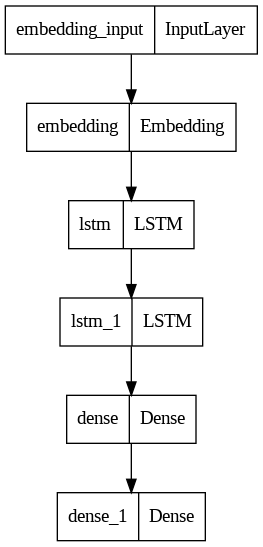

In [ ]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)


###Step 7: Train the model


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics = ["accuracy"])
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
1703/1703 [==============================] - ETA: 0s - loss: 6.4081
Epoch 1: loss improved from inf to 6.40808, saving model to next_words.h5
1703/1703 [==============================] - 44s 21ms/step - loss: 6.4081
Epoch 2/70
1703/1703 [==============================] - ETA: 0s - loss: 5.8201
Epoch 2: loss improved from 6.40808 to 5.82009, saving model to next_words.h5
1703/1703 [==============================] - 29s 17ms/step - loss: 5.8201
Epoch 3/70
1703/1703 [==============================] - ETA: 0s - loss: 5.4942
Epoch 3: loss improved from 5.82009 to 5.49422, saving model to next_words.h5
1703/1703 [==============================] - 29s 17ms/step - loss: 5.4942
Epoch 4/70
1703/1703 [==============================] - ETA: 0s - loss: 5.2291
Epoch 4: loss improved from 5.49422 to 5.22908, saving model to next_words.h5
1703/1703 [==============================] - 33s 19ms/step - loss: 5.2291
Epoch 5/70
1700/1703 [============================>.] - ETA: 0s - loss: 4.9916
E

###Step 7: Let's predict



In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""

  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break

  print(predicted_word)
  return predicted_word

while(True):
  text = input("Enter your line: ")

  if text == "0":
      print("Execution completed.....")
      break

  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)

          Predict_Next_Words(model, tokenizer, text)

      except Exception as e:
        print("Error occurred: ",e)
        continue